In [ ]:
# We need to import necessary librabries to work for our plan.
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])
  ))

User uploaded file "globalterrorismdb_0718dist.csv" with length 162812896 bytes


In [ ]:
uploaded

In [ ]:
open('globalterrorismdb_0718dist.csv', encoding='latin-1')

<_io.TextIOWrapper name='globalterrorismdb_0718dist.csv' mode='r' encoding='latin-1'>

In [ ]:
import pandas as pd
df =pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
df

eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            58  Dominican Republic       2  ...      NaN   
1           130              Mexico       1  ...      NaN   
2           160         Philippines       5  ...      NaN   
3            78              Greece       8  ...      NaN   
4           101               Japan       4  ...      NaN   
...         ...                 ...     ...  ...      ...   
181686      182             Somalia      11  ...      NaN   
181687      200               Syria      10  ...      NaN   
181688      160         Philippines       5  ...      NaN   
181689       92               India       6  ...      NaN   
181690      160         Philippines       5  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGIS        0         0        0       0      Na

In [ ]:
df.shape

(181691, 135)

Cleaning or pre-processing of data

In [ ]:
# Taking only wanted data so choosing the wanted column required for performing EDA
usecols= [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamescols= {
      'iyear': 'uyear',
       'country_txt' : 'country_txtt',
        'region_txt' : 'region_txtt',
         'latitude': 'lat',
          'longittude': 'long',
         'provstate':  'provsstate',
          'attacktype1_txt' : 'attackedtype1',
          'targtypet1_txt' : 'targettype1',
           'weaptype1_txt' :  'weapontype',
            'nperps' : 'nperhps',
             'nkill' : 'nkilled',
             'nkillter': 'nkilledter',
             'nwound' : 'nwounded',
             'nwondte': 'nwondedte',
              'propextent_txt' : 'propertyextent'
          
     
}

In [ ]:
## Reading the dataset
df =pd.read_csv('globalterrorismdb_0718dist.csv',encoding= 'ISO-8859-1', usecols=usecols)
df.rename(columns=renamescols, inplace =True)
print('Data read Successfully')

Data read Successfully


In [ ]:
df

uyear  extended        country_txtt                  region_txtt  \
0        1970         0  Dominican Republic  Central America & Caribbean   
1        1970         0              Mexico                North America   
2        1970         0         Philippines               Southeast Asia   
3        1970         0              Greece               Western Europe   
4        1970         0               Japan                    East Asia   
...       ...       ...                 ...                          ...   
181686   2017         0             Somalia           Sub-Saharan Africa   
181687   2017         0               Syria   Middle East & North Africa   
181688   2017         0         Philippines               Southeast Asia   
181689   2017         0               India                   South Asia   
181690   2017         0         Philippines               Southeast Asia   

             provsstate           city        lat   longitude  multiple  \
0                   NaN  Santo Domingo  18.456792  -69.951164       0.0   
1               Federal    Mexico city  19.371887  -99.086624       0.0   
2                Tarlac        Unknown  15.478598  120.599741       0.0   
3                Attica         Athens  37.997490   23.762728       0.0   
4               Fukouka        Fukouka  33.580412  130.396361       0.0   
...                 ...            ...        ...         ...       ...   
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034       0.0   
181687         Lattakia         Jableh  35.407278   35.942679       0.0   
181688      Maguindanao       Kubentog   6.900742  124.437908       0.0   
181689          Manipur         Imphal  24.798346   93.940430       0.0   
181690      Maguindanao  Cotabato City   7.209594  124.241966       0.0   

        success  ...                                       gname nperhps  \
0             1  ...                                      MANO-D     NaN   
1             1  ...          23rd of September Communist League     7.0   
2             1  ...                                     Unknown     NaN   
3             1  ...                                     Unknown     NaN   
4             1  ...                                     Unknown     NaN   
...         ...  ...                                         ...     ...   
181686        1  ...                                  Al-Shabaab   -99.0   
181687        1  ...                           Muslim extremists   -99.0   
181688        1  ...  Bangsamoro Islamic Freedom Movement (BIFM)   -99.0   
181689        0  ...                                     Unknown   -99.0   
181690        0  ...                                     Unknown   -99.0   

       claimed  weapontype  nkilled  nkilledter nwounded  nwoundte  property  \
0          NaN     Unknown      1.0         NaN      0.0       NaN         0   
1          NaN     Unknown      0.0         NaN      0.0       NaN         0   
2          NaN     Unknown      1.0         NaN      0.0       NaN         0   
3          NaN  Explosives      NaN         NaN      NaN       NaN         1   
4          NaN  Incendiary      NaN         NaN      NaN       NaN         1   
...        ...         ...      ...         ...      ...       ...       ...   
181686     1.0    Firearms      1.0         0.0      2.0       0.0        -9   
181687     0.0  Explosives      2.0         0.0      7.0       0.0         1   
181688     0.0  Incendiary      0.0         0.0      0.0       0.0         1   
181689     0.0  Explosives      0.0         0.0      0.0       0.0        -9   
181690     0.0  Explosives      0.0         0.0      0.0       0.0         0   

        propertyextent  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
181686             NaN  
181687         Unknown  
181688         Unknown  
181689             NaN  
181690             NaN  

[181691 rows x 23 c

In [ ]:
## Removing the unknowns values from the columnns
df=df[pd.notnull(df.lat)]
df=df[pd.notnull(df.longitude)]
print("Unknown values are removed from the columns")

Unknown values are removed from the columns


In [ ]:
## Number of Duplicate Values in the dataset
df.duplicated().sum()

21123

In [ ]:
##Removal of Duplicated values
df.drop_duplicates(keep=False,inplace=True)

In [ ]:
## Checking Null Values in the dataset
df.isnull().sum()

uyear                 0
extended              0
country_txtt          0
region_txtt           0
provsstate          409
city                366
lat                   0
longitude             0
multiple              1
success               0
suicide               0
attackedtype1         0
targtype1_txt         0
gname                 0
nperhps           51729
claimed           47212
weapontype            0
nkilled            7555
nkilledter        48051
nwounded          12494
nwoundte          50093
property              0
propertyextent    94965
dtype: int64

In [ ]:
df.fillna(0)

uyear  extended        country_txtt                  region_txtt  \
0        1970         0  Dominican Republic  Central America & Caribbean   
1        1970         0              Mexico                North America   
2        1970         0         Philippines               Southeast Asia   
3        1970         0              Greece               Western Europe   
4        1970         0               Japan                    East Asia   
...       ...       ...                 ...                          ...   
181686   2017         0             Somalia           Sub-Saharan Africa   
181687   2017         0               Syria   Middle East & North Africa   
181688   2017         0         Philippines               Southeast Asia   
181689   2017         0               India                   South Asia   
181690   2017         0         Philippines               Southeast Asia   

             provsstate           city        lat   longitude  multiple  \
0                     0  Santo Domingo  18.456792  -69.951164       0.0   
1               Federal    Mexico city  19.371887  -99.086624       0.0   
2                Tarlac        Unknown  15.478598  120.599741       0.0   
3                Attica         Athens  37.997490   23.762728       0.0   
4               Fukouka        Fukouka  33.580412  130.396361       0.0   
...                 ...            ...        ...         ...       ...   
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034       0.0   
181687         Lattakia         Jableh  35.407278   35.942679       0.0   
181688      Maguindanao       Kubentog   6.900742  124.437908       0.0   
181689          Manipur         Imphal  24.798346   93.940430       0.0   
181690      Maguindanao  Cotabato City   7.209594  124.241966       0.0   

        success  ...                                       gname nperhps  \
0             1  ...                                      MANO-D     0.0   
1             1  ...          23rd of September Communist League     7.0   
2             1  ...                                     Unknown     0.0   
3             1  ...                                     Unknown     0.0   
4             1  ...                                     Unknown     0.0   
...         ...  ...                                         ...     ...   
181686        1  ...                                  Al-Shabaab   -99.0   
181687        1  ...                           Muslim extremists   -99.0   
181688        1  ...  Bangsamoro Islamic Freedom Movement (BIFM)   -99.0   
181689        0  ...                                     Unknown   -99.0   
181690        0  ...                                     Unknown   -99.0   

       claimed  weapontype  nkilled  nkilledter nwounded  nwoundte  property  \
0          0.0     Unknown      1.0         0.0      0.0       0.0         0   
1          0.0     Unknown      0.0         0.0      0.0       0.0         0   
2          0.0     Unknown      1.0         0.0      0.0       0.0         0   
3          0.0  Explosives      0.0         0.0      0.0       0.0         1   
4          0.0  Incendiary      0.0         0.0      0.0       0.0         1   
...        ...         ...      ...         ...      ...       ...       ...   
181686     1.0    Firearms      1.0         0.0      2.0       0.0        -9   
181687     0.0  Explosives      2.0         0.0      7.0       0.0         1   
181688     0.0  Incendiary      0.0         0.0      0.0       0.0         1   
181689     0.0  Explosives      0.0         0.0      0.0       0.0        -9   
181690     0.0  Explosives      0.0         0.0      0.0       0.0         0   

        propertyextent  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
181686               0  
181687         Unknown  
181688         Unknown  
181689               0  
181690               0  

[146986 rows x 23 c

In [ ]:
df.isnull()

uyear  extended  country_txtt  region_txtt  provsstate   city    lat  \
0       False     False         False        False        True  False  False   
1       False     False         False        False       False  False  False   
2       False     False         False        False       False  False  False   
3       False     False         False        False       False  False  False   
4       False     False         False        False       False  False  False   
...       ...       ...           ...          ...         ...    ...    ...   
181686  False     False         False        False       False  False  False   
181687  False     False         False        False       False  False  False   
181688  False     False         False        False       False  False  False   
181689  False     False         False        False       False  False  False   
181690  False     False         False        False       False  False  False   

        longitude  multiple  success  ...  gname  nperhps  claimed  \
0           False     False    False  ...  False     True     True   
1           False     False    False  ...  False    False     True   
2           False     False    False  ...  False     True     True   
3           False     False    False  ...  False     True     True   
4           False     False    False  ...  False     True     True   
...           ...       ...      ...  ...    ...      ...      ...   
181686      False     False    False  ...  False    False    False   
181687      False     False    False  ...  False    False    False   
181688      False     False    False  ...  False    False    False   
181689      False     False    False  ...  False    False    False   
181690      False     False    False  ...  False    False    False   

        weapontype  nkilled  nkilledter  nwounded  nwoundte  property  \
0            False    False        True     False      True     False   
1            False    False        True     False      True     False   
2            False    False        True     False      True     False   
3            False     True        True      True      True     False   
4            False     True        True      True      True     False   
...            ...      ...         ...       ...       ...       ...   
181686       False    False       False     False     False     False   
181687       False    False       False     False     False     False   
181688       False    False       False     False     False     False   
181689       False    False       False     False     False     False   
181690       False    False       False     False     False     False   

        propertyextent  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  
...                ...  
181686            True  
181687           False  
181688           False  
181689            True  
181690            True  

[146986 rows x 23 columns]

In [ ]:
df.isnull().sum()

uyear                 0
extended              0
country_txtt          0
region_txtt           0
provsstate          409
city                366
lat                   0
longitude             0
multiple              1
success               0
suicide               0
attackedtype1         0
targtype1_txt         0
gname                 0
nperhps           51729
claimed           47212
weapontype            0
nkilled            7555
nkilledter        48051
nwounded          12494
nwoundte          50093
property              0
propertyextent    94965
dtype: int64

In [ ]:
df.fillna((0),inplace =True)

In [ ]:
df.isnull().sum()

uyear             0
extended          0
country_txtt      0
region_txtt       0
provsstate        0
city              0
lat               0
longitude         0
multiple          0
success           0
suicide           0
attackedtype1     0
targtype1_txt     0
gname             0
nperhps           0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundte          0
property          0
propertyextent    0
dtype: int64

In [ ]:
df.isnull().sum()

uyear             0
extended          0
country_txtt      0
region_txtt       0
provsstate        0
city              0
lat               0
longitude         0
multiple          0
success           0
suicide           0
attackedtype1     0
targtype1_txt     0
gname             0
nperhps           0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundte          0
property          0
propertyextent    0
dtype: int64

In [ ]:
df

uyear  extended        country_txtt                  region_txtt  \
0        1970         0  Dominican Republic  Central America & Caribbean   
1        1970         0              Mexico                North America   
2        1970         0         Philippines               Southeast Asia   
3        1970         0              Greece               Western Europe   
4        1970         0               Japan                    East Asia   
...       ...       ...                 ...                          ...   
181686   2017         0             Somalia           Sub-Saharan Africa   
181687   2017         0               Syria   Middle East & North Africa   
181688   2017         0         Philippines               Southeast Asia   
181689   2017         0               India                   South Asia   
181690   2017         0         Philippines               Southeast Asia   

             provsstate           city        lat   longitude  multiple  \
0                     0  Santo Domingo  18.456792  -69.951164       0.0   
1               Federal    Mexico city  19.371887  -99.086624       0.0   
2                Tarlac        Unknown  15.478598  120.599741       0.0   
3                Attica         Athens  37.997490   23.762728       0.0   
4               Fukouka        Fukouka  33.580412  130.396361       0.0   
...                 ...            ...        ...         ...       ...   
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034       0.0   
181687         Lattakia         Jableh  35.407278   35.942679       0.0   
181688      Maguindanao       Kubentog   6.900742  124.437908       0.0   
181689          Manipur         Imphal  24.798346   93.940430       0.0   
181690      Maguindanao  Cotabato City   7.209594  124.241966       0.0   

        success  ...                                       gname nperhps  \
0             1  ...                                      MANO-D     0.0   
1             1  ...          23rd of September Communist League     7.0   
2             1  ...                                     Unknown     0.0   
3             1  ...                                     Unknown     0.0   
4             1  ...                                     Unknown     0.0   
...         ...  ...                                         ...     ...   
181686        1  ...                                  Al-Shabaab   -99.0   
181687        1  ...                           Muslim extremists   -99.0   
181688        1  ...  Bangsamoro Islamic Freedom Movement (BIFM)   -99.0   
181689        0  ...                                     Unknown   -99.0   
181690        0  ...                                     Unknown   -99.0   

       claimed  weapontype  nkilled  nkilledter nwounded  nwoundte  property  \
0          0.0     Unknown      1.0         0.0      0.0       0.0         0   
1          0.0     Unknown      0.0         0.0      0.0       0.0         0   
2          0.0     Unknown      1.0         0.0      0.0       0.0         0   
3          0.0  Explosives      0.0         0.0      0.0       0.0         1   
4          0.0  Incendiary      0.0         0.0      0.0       0.0         1   
...        ...         ...      ...         ...      ...       ...       ...   
181686     1.0    Firearms      1.0         0.0      2.0       0.0        -9   
181687     0.0  Explosives      2.0         0.0      7.0       0.0         1   
181688     0.0  Incendiary      0.0         0.0      0.0       0.0         1   
181689     0.0  Explosives      0.0         0.0      0.0       0.0        -9   
181690     0.0  Explosives      0.0         0.0      0.0       0.0         0   

        propertyextent  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
181686               0  
181687         Unknown  
181688         Unknown  
181689               0  
181690               0  

[146986 rows x 23 c

In [ ]:
## Checking out the number of columns with names
df.columns

Index(['uyear', 'extended', 'country_txtt', 'region_txtt', 'provsstate',
       'city', 'lat', 'longitude', 'multiple', 'success', 'suicide',
       'attackedtype1', 'targtype1_txt', 'gname', 'nperhps', 'claimed',
       'weapontype', 'nkilled', 'nkilledter', 'nwounded', 'nwoundte',
       'property', 'propertyextent'],
      dtype='object')

Checking its data types

In [ ]:
df.dtypes

uyear               int64
extended            int64
country_txtt       object
region_txtt        object
provsstate         object
city               object
lat               float64
longitude         float64
multiple          float64
success             int64
suicide             int64
attackedtype1      object
targtype1_txt      object
gname              object
nperhps           float64
claimed           float64
weapontype         object
nkilled           float64
nkilledter        float64
nwounded          float64
nwoundte          float64
property            int64
propertyextent     object
dtype: object

In [ ]:
df.head(5)


uyear  extended        country_txtt                  region_txtt  \
0   1970         0  Dominican Republic  Central America & Caribbean   
1   1970         0              Mexico                North America   
2   1970         0         Philippines               Southeast Asia   
3   1970         0              Greece               Western Europe   
4   1970         0               Japan                    East Asia   

  provsstate           city        lat   longitude  multiple  success  ...  \
0          0  Santo Domingo  18.456792  -69.951164       0.0        1  ...   
1    Federal    Mexico city  19.371887  -99.086624       0.0        1  ...   
2     Tarlac        Unknown  15.478598  120.599741       0.0        1  ...   
3     Attica         Athens  37.997490   23.762728       0.0        1  ...   
4    Fukouka        Fukouka  33.580412  130.396361       0.0        1  ...   

                                gname nperhps claimed  weapontype  nkilled  \
0                              MANO-D     0.0     0.0     Unknown      1.0   
1  23rd of September Communist League     7.0     0.0     Unknown      0.0   
2                             Unknown     0.0     0.0     Unknown      1.0   
3                             Unknown     0.0     0.0  Explosives      0.0   
4                             Unknown     0.0     0.0  Incendiary      0.0   

   nkilledter nwounded  nwoundte  property  propertyextent  
0         0.0      0.0       0.0         0               0  
1         0.0      0.0       0.0         0               0  
2         0.0      0.0       0.0         0               0  
3         0.0      0.0       0.0         1               0  
4         0.0      0.0       0.0         1               0  

[5 rows x 23 columns]

In [ ]:
df.tail(5)

uyear  extended country_txtt                 region_txtt  \
181686   2017         0      Somalia          Sub-Saharan Africa   
181687   2017         0        Syria  Middle East & North Africa   
181688   2017         0  Philippines              Southeast Asia   
181689   2017         0        India                  South Asia   
181690   2017         0  Philippines              Southeast Asia   

             provsstate           city        lat   longitude  multiple  \
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034       0.0   
181687         Lattakia         Jableh  35.407278   35.942679       0.0   
181688      Maguindanao       Kubentog   6.900742  124.437908       0.0   
181689          Manipur         Imphal  24.798346   93.940430       0.0   
181690      Maguindanao  Cotabato City   7.209594  124.241966       0.0   

        success  ...                                       gname nperhps  \
181686        1  ...                                  Al-Shabaab   -99.0   
181687        1  ...                           Muslim extremists   -99.0   
181688        1  ...  Bangsamoro Islamic Freedom Movement (BIFM)   -99.0   
181689        0  ...                                     Unknown   -99.0   
181690        0  ...                                     Unknown   -99.0   

       claimed  weapontype  nkilled  nkilledter nwounded  nwoundte  property  \
181686     1.0    Firearms      1.0         0.0      2.0       0.0        -9   
181687     0.0  Explosives      2.0         0.0      7.0       0.0         1   
181688     0.0  Incendiary      0.0         0.0      0.0       0.0         1   
181689     0.0  Explosives      0.0         0.0      0.0       0.0        -9   
181690     0.0  Explosives      0.0         0.0      0.0       0.0         0   

        propertyextent  
181686               0  
181687         Unknown  
181688         Unknown  
181689               0  
181690               0  

[5 rows x 23 columns]

Full Summary of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146986 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uyear           146986 non-null  int64  
 1   extended        146986 non-null  int64  
 2   country_txtt    146986 non-null  object 
 3   region_txtt     146986 non-null  object 
 4   provsstate      146986 non-null  object 
 5   city            146986 non-null  object 
 6   lat             146986 non-null  float64
 7   longitude       146986 non-null  float64
 8   multiple        146986 non-null  float64
 9   success         146986 non-null  int64  
 10  suicide         146986 non-null  int64  
 11  attackedtype1   146986 non-null  object 
 12  targtype1_txt   146986 non-null  object 
 13  gname           146986 non-null  object 
 14  nperhps         146986 non-null  float64
 15  claimed         146986 non-null  float64
 16  weapontype      146986 non-null  object 
 17  nkilled   

Count of Values in each column of Dataset

In [ ]:
df.nunique()

uyear                47
extended              2
country_txtt        204
region_txtt          12
provsstate         2823
city              34807
lat               47873
longitude         47588
multiple              2
success               2
suicide               2
attackedtype1         9
targtype1_txt        22
gname              3401
nperhps             109
claimed               3
weapontype           12
nkilled             201
nkilledter           96
nwounded            238
nwoundte             44
property              3
propertyextent        5
dtype: int64

Years in the Dataset

In [ ]:
df['uyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

Counting of each year in the dataset

In [ ]:
df['uyear'].value_counts()

2014    14303
2015    12449
2016    11060
2013    10435
2017     9665
2012     7604
2008     4333
2009     4169
2011     4167
2010     4103
1992     3753
1991     3236
1989     3163
2007     2925
1988     2792
1994     2637
1990     2572
2006     2542
1984     2279
1997     2267
1983     2166
1996     2146
1987     2085
1981     2021
1980     1998
1995     1998
1982     1961
1979     1949
1986     1946
1985     1923
2005     1901
2001     1782
2000     1643
2002     1244
1999     1239
1978     1205
2003     1186
2004     1104
1977      986
1998      826
1976      688
1975      575
1970      518
1974      424
1971      366
1973      349
1972      303
Name: uyear, dtype: int64

Total count of region in the Dataset

In [ ]:
df['region_txtt'].value_counts()

South Asia                     39971
Middle East & North Africa     39491
Sub-Saharan Africa             15423
South America                  12978
Western Europe                 12285
Southeast Asia                 10980
Central America & Caribbean     6995
Eastern Europe                  4599
North America                   2879
East Asia                        628
Central Asia                     498
Australasia & Oceania            259
Name: region_txtt, dtype: int64

Total Counts of Cities in the Dataset

In [ ]:
df['city'].value_counts()

Unknown       5760
Baghdad       4106
Karachi       1493
Mosul         1455
Mogadishu     1250
              ... 
Tuusula          1
Koh Mak          1
Shambuko         1
Baladweyne       1
Kubentog         1
Name: city, Length: 34807, dtype: int64

Total counts of Attack type in the Dataset

In [ ]:
df['attackedtype1'].value_counts()

Bombing/Explosion                      67298
Armed Assault                          36845
Assassination                          16348
Hostage Taking (Kidnapping)            10018
Facility/Infrastructure Attack          7878
Unknown                                 6303
Hostage Taking (Barricade Incident)      846
Unarmed Assault                          844
Hijacking                                606
Name: attackedtype1, dtype: int64

Total Counts of Target type in Dataset

In [ ]:
df['targtype1_txt'].value_counts()


Private Citizens & Property       34737
Military                          24514
Police                            21594
Government (General)              17536
Business                          14623
Transportation                     5309
Unknown                            4096
Religious Figures/Institutions     3875
Educational Institution            3497
Government (Diplomatic)            3128
Utilities                          2896
Terrorists/Non-State Militia       2778
Journalists & Media                2541
Violent Political Party            1644
Airports & Aircraft                1226
NGO                                 908
Telecommunication                   809
Tourists                            397
Maritime                            285
Food or Water Supply                266
Abortion Related                    203
Other                               124
Name: targtype1_txt, dtype: int64

Statistical Summary of Data

In [ ]:
df.describe()

uyear       extended            lat     longitude  \
count  146986.000000  146986.000000  146986.000000  1.469860e+05   
mean     2003.593499       0.050590      23.688252 -5.548676e+02   
std        12.936236       0.219159      17.899265  2.248011e+05   
min      1970.000000       0.000000     -53.154613 -8.618590e+07   
25%      1992.000000       0.000000      11.400638  8.808213e+00   
50%      2010.000000       0.000000      31.322678  4.376645e+01   
75%      2014.000000       0.000000      34.621521  6.980546e+01   
max      2017.000000       1.000000      74.633553  1.793667e+02   

            multiple        success        suicide        nperhps  \
count  146986.000000  146986.000000  146986.000000  146986.000000   
mean        0.086716       0.886499       0.043460     -42.688957   
std         0.281419       0.317205       0.203891     108.563825   
min         0.000000       0.000000       0.000000     -99.000000   
25%         0.000000       1.000000       0.000000     -99.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000   25000.000000   

             claimed        nkilled     nkilledter       nwounded  \
count  146986.000000  146986.000000  146986.000000  146986.000000   
mean        0.033398       2.578225       0.383615       3.312159   
std         0.934334      12.194752       3.697621      38.061657   
min        -9.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       2.000000       0.000000       2.000000   
max         1.000000    1570.000000     500.000000    8191.000000   

            nwoundte       property  
count  146986.000000  146986.000000  
mean        0.079967      -0.596417  
std         1.298710       3.148533  
min         0.000000      -9.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       1.000000  
max       200.000000       1.000000

Correlation among the columns

In [ ]:
df.corr()

eventid     iyear    imonth      iday  extended   country  \
eventid    1.000000  0.999996  0.002706  0.018336  0.091761 -0.135039   
iyear      0.999996  1.000000  0.000139  0.018254  0.091754 -0.135023   
imonth     0.002706  0.000139  1.000000  0.005497 -0.000468 -0.006305   
iday       0.018336  0.018254  0.005497  1.000000 -0.004700  0.003468   
extended   0.091761  0.091754 -0.000468 -0.004700  1.000000 -0.020466   
...             ...       ...       ...       ...       ...       ...   
nreleased -0.181612 -0.181556 -0.011535  0.001765 -0.192155 -0.044331   
INT_LOG   -0.143600 -0.143601 -0.002302 -0.001540  0.071768  0.069904   
INT_IDEO  -0.133252 -0.133253 -0.002034 -0.001621  0.075147  0.067564   
INT_MISC  -0.077852 -0.077847 -0.002554 -0.002027  0.027335  0.207281   
INT_ANY   -0.175605 -0.175596 -0.006336 -0.001199  0.080767  0.153118   

             region  latitude  longitude  specificity  ...  ransomamt  \
eventid    0.401371  0.166886   0.003907     0.030641  ...  -0.009990   
iyear      0.401384  0.166933   0.003917     0.030626  ...  -0.009984   
imonth    -0.002999 -0.015978  -0.003880     0.003621  ...  -0.000710   
iday       0.009710  0.003423  -0.002285    -0.006991  ...   0.012755   
extended   0.038389 -0.024749   0.000523     0.057897  ...  -0.008114   
...             ...       ...        ...          ...  ...        ...   
nreleased -0.149511  0.002790  -0.017745    -0.030631  ...   0.054571   
INT_LOG   -0.082584 -0.099827   0.002272     0.073022  ...   0.035821   
INT_IDEO  -0.071917 -0.094470   0.002268     0.071333  ...   0.039053   
INT_MISC   0.043139  0.097652   0.000371    -0.019197  ...   0.023815   
INT_ANY   -0.047900 -0.041530   0.002497     0.061389  ...   0.028054   

           ransomamtus  ransompaid  ransompaidus  hostkidoutcome  nreleased  \
eventid      -0.018001   -0.014094     -0.165422        0.256113  -0.181612   
iyear        -0.018216   -0.014238     -0.165375        0.256092  -0.181556   
imonth        0.046989    0.058878     -0.016597        0.011295  -0.011535   
iday         -0.010502    0.003148     -0.006581       -0.006706   0.001765   
extended      0.028177    0.001966      0.009367        0.233293  -0.192155   
...                ...         ...           ...             ...        ...   
nreleased     0.034843    0.049322      0.016832       -0.555478   1.000000   
INT_LOG       0.031079    0.007029     -0.045504       -0.015442   0.039388   
INT_IDEO      0.041983    0.013162     -0.039844       -0.016234   0.040947   
INT_MISC      0.125162    0.037227      0.129274       -0.119776   0.085055   
INT_ANY       0.053484    0.007275      0.056438       -0.061946   0.064759   

            INT_LOG  INT_IDEO  INT_MISC   INT_ANY  
eventid   -0.143600 -0.133252 -0.077852 -0.175605  
iyear     -0.143601 -0.133253 -0.077847 -0.175596  
imonth    -0.002302 -0.002034 -0.002554 -0.006336  
iday      -0.001540 -0.001621 -0.002027 -0.001199  
extended   0.071768  0.075147  0.027335  0.080767  
...             ...       ...       ...       ...  
nreleased  0.039388  0.040947  0.085055  0.064759  
INT_LOG    1.000000  0.996211  0.052537  0.891051  
INT_IDEO   0.996211  1.000000  0.082014  0.893811  
INT_MISC   0.052537  0.082014  1.000000  0.252193  
INT_ANY    0.891051  0.893811  0.252193  1.000000  

[77 rows x 77 columns]

Slicinng of Data

In [ ]:
df.iloc[0]

eventid       197000000001
iyear                 1970
imonth                   7
iday                     2
approxdate             NaN
                  ...     
INT_LOG                  0
INT_IDEO                 0
INT_MISC                 0
INT_ANY                  0
related                NaN
Name: 0, Length: 135, dtype: object

In [ ]:
df.iloc[:,1]

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: iyear, Length: 181691, dtype: int64

Visualing the Data

Heat map of Correlation among the columns

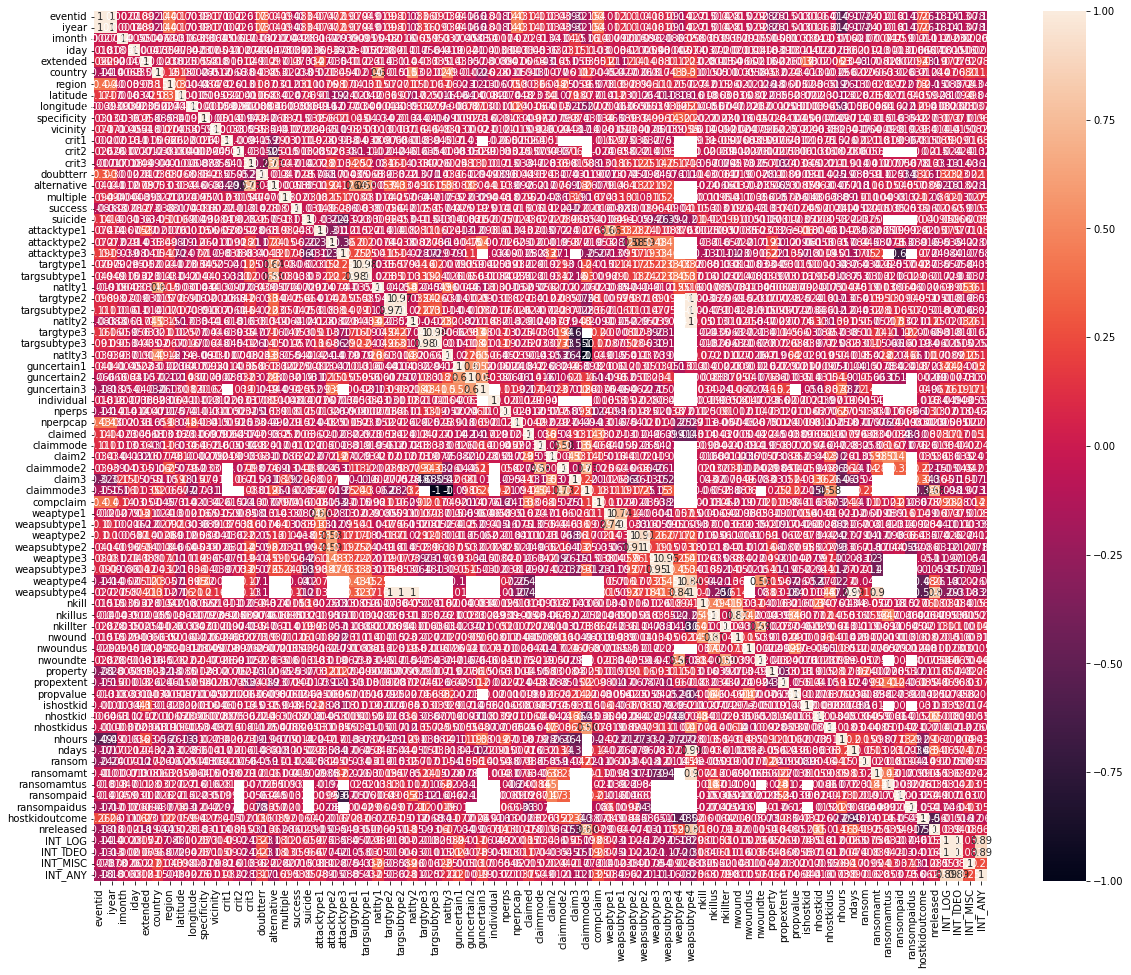

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.corr(), annot =True)
plt.show()

Heat map of Covariance among the set of variables

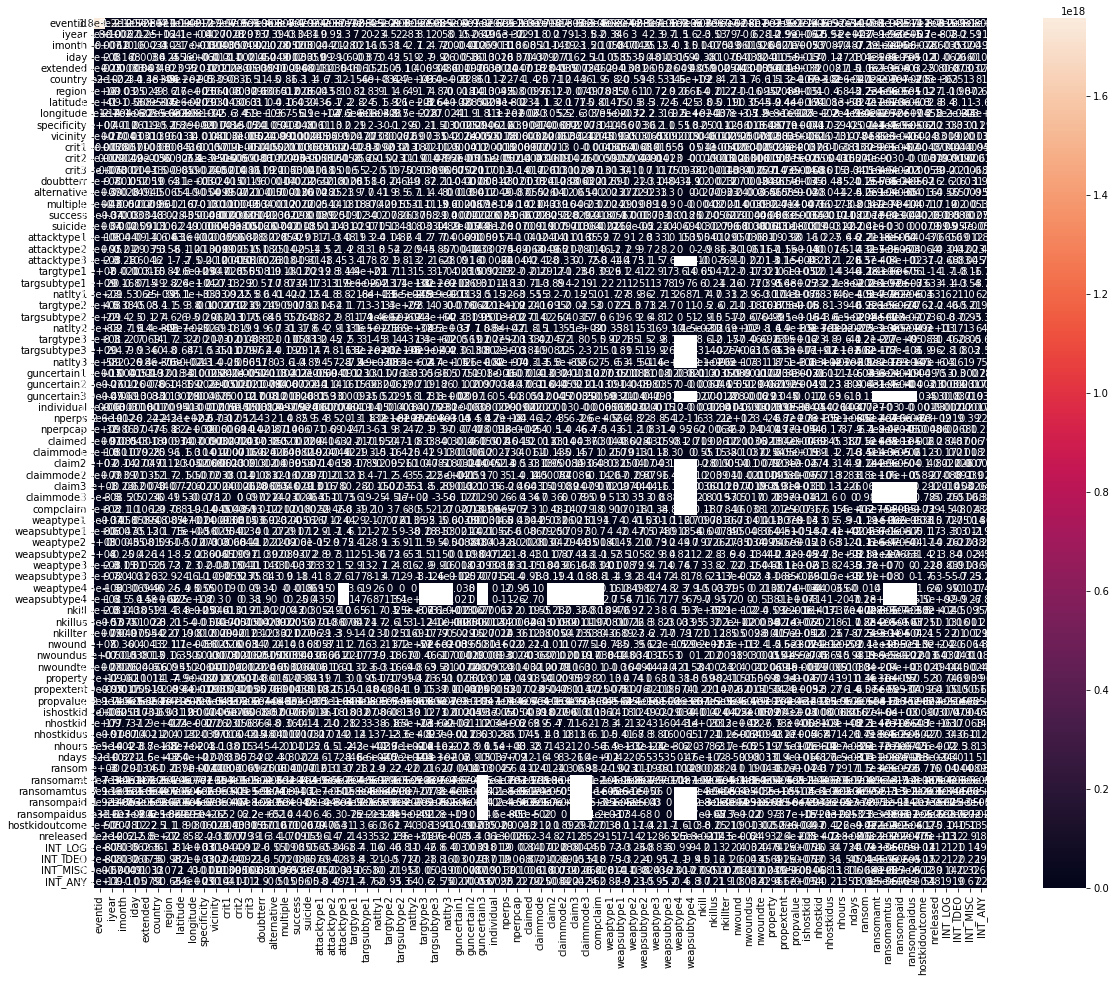

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.cov(), annot =True)
plt.show()


Pie Plot of Attacks types

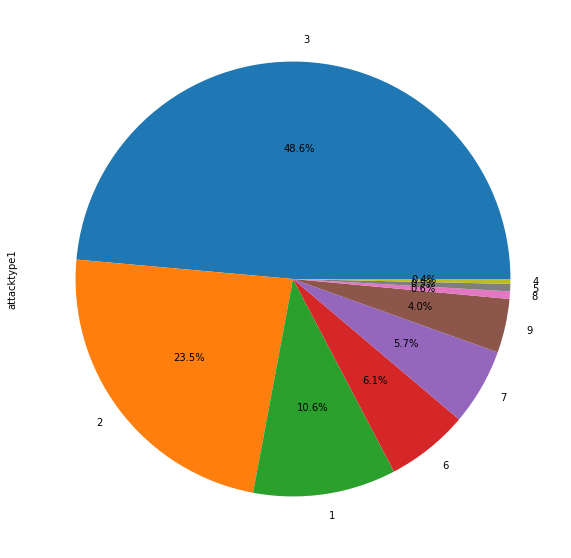

In [ ]:
plt.figure(figsize=(10,10))
df['attacktype1'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

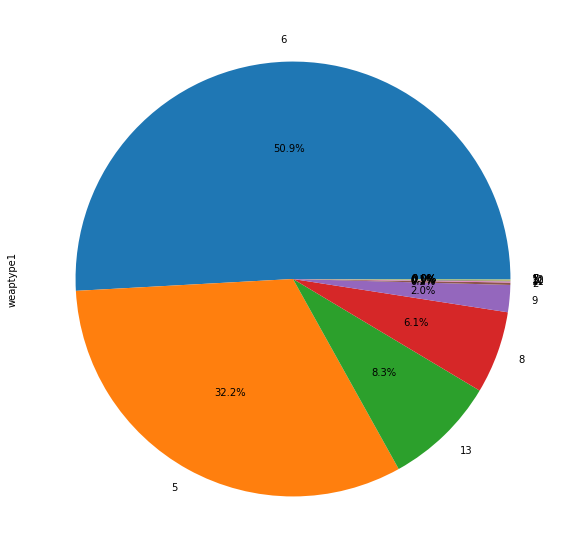

In [84]:
plt.figure(figsize=(10,10))
df['weaptype1'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

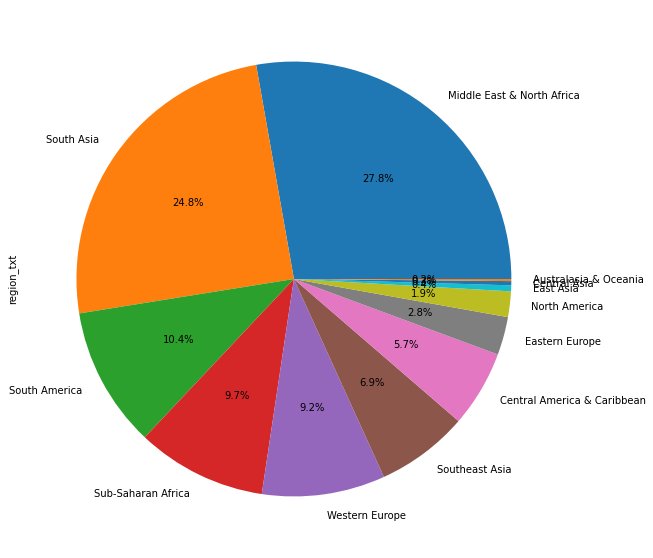

In [ ]:
plt.figure(figsize=(10,10))
df['region_txt'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

Number of Terrorist activities by Regions

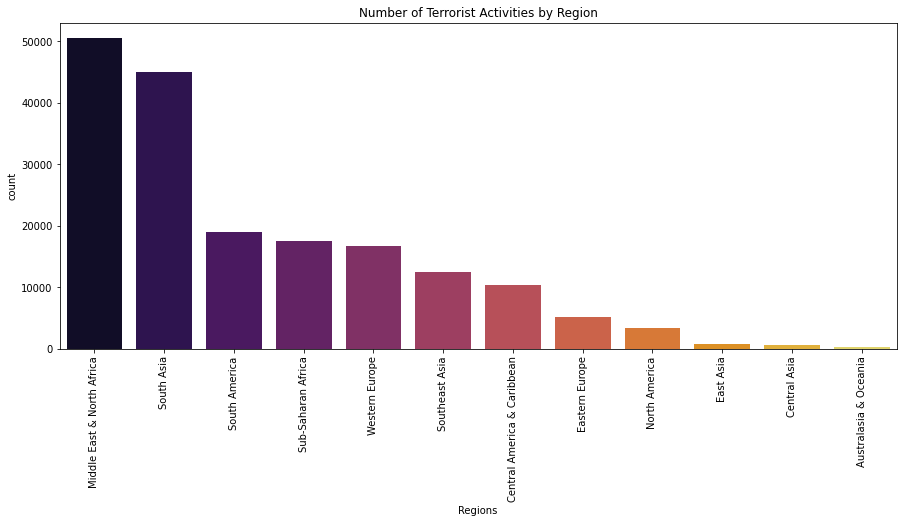

In [ ]:
plt.subplots(figsize =(15,6))
sns.countplot('region_txt',data=df,palette='inferno',order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number of Terrorist Activities by Region')
plt.show()

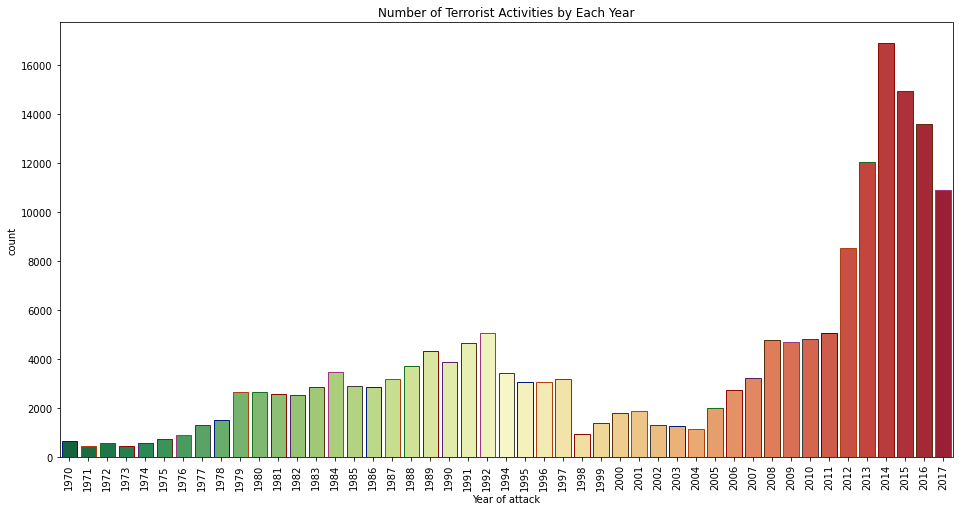

In [86]:
#Number of Terrorist Activities by Each Year
plt.subplots(figsize =(16,8))
sns.countplot('iyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',8))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number of Terrorist Activities by Each Year')
plt.show()

Frequency of Attacks

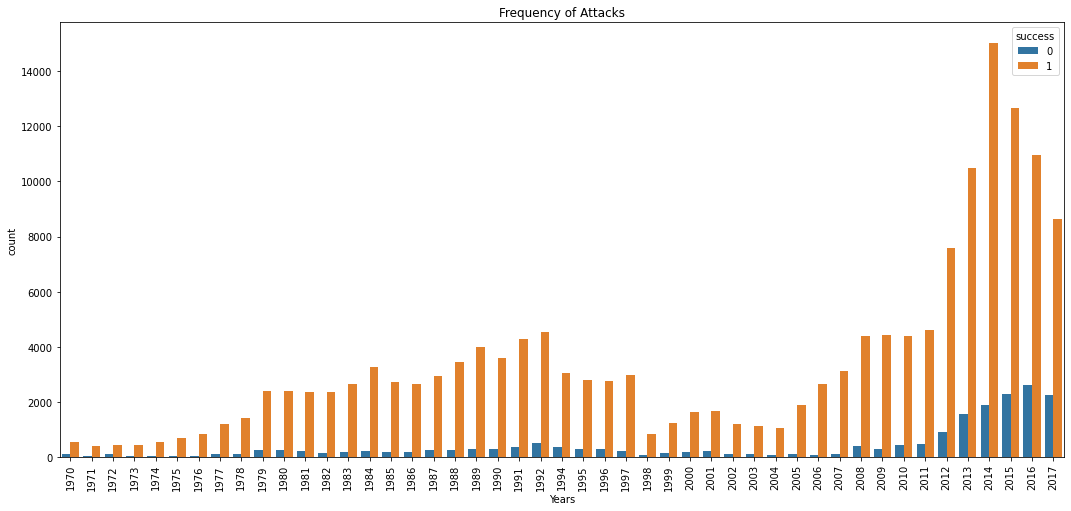

In [87]:
plt.subplots(figsize =(18,8))
sns.countplot(x=df['iyear'], hue ='success', data = df)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Frequency of Attacks')
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

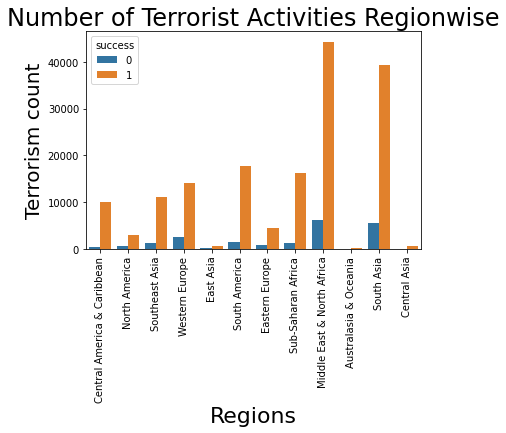

In [ ]:
#Number of Terrorist Activities by Region Wise
sns.countplot(x=df['region_txt'], hue ='success', data=df)
plt.xlabel("Regions", fontsize =22)
plt.xticks(rotation=90)
plt.ylabel("Terrorism count", fontsize =20)
plt.title("Number of Terrorist Activities Regionwise", fontsize =24)

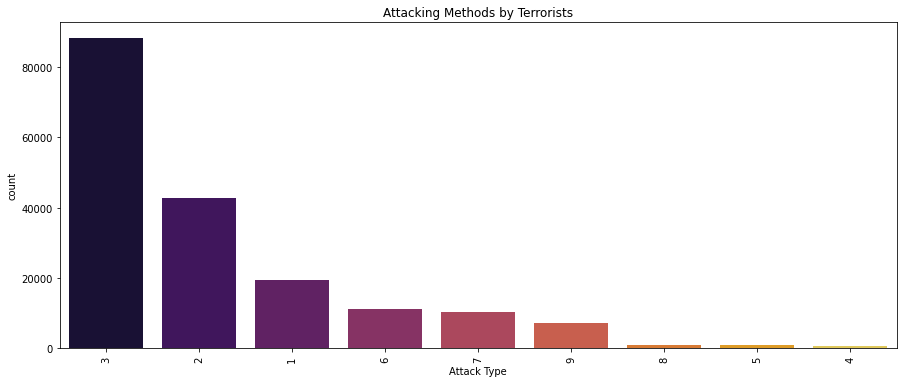

In [89]:
#Attacking Methods by Terrorists
plt.subplots(figsize =(15,6))
sns.countplot('attacktype1',data=df,palette='inferno',order=df['attacktype1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

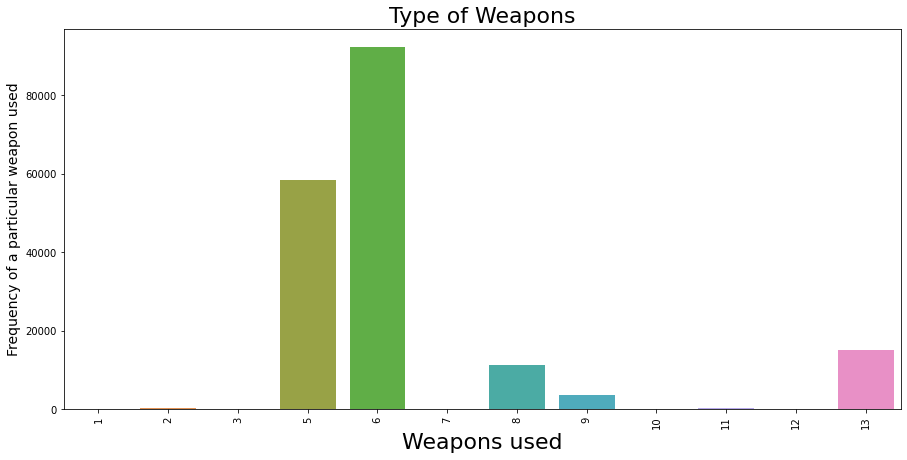

In [91]:
#Types of Weapons used by terrorists
plt.figure(figsize =(15,7))
sns.barplot(x=df['weaptype1'].value_counts()[:50].index,y =df['weaptype1'].value_counts()[:50].values)
plt.xticks(rotation=90)
plt.xlabel('Weapons used', fontsize =22)
plt.ylabel("Frequency of a particular weapon used", fontsize =14)
plt.title("Type of Weapons", fontsize =22)
plt.show()

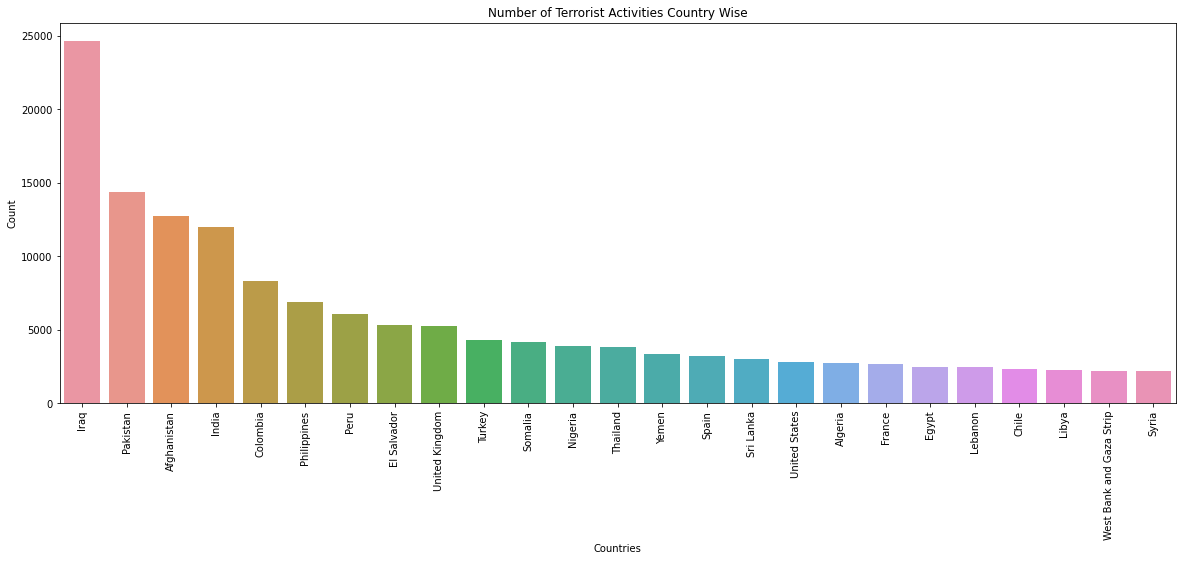

In [92]:
#Number of terrorist activities countrywise
plt.figure(figsize =(20,7))
sns.barplot(x=df['country_txt'].value_counts()[:25].index,y =df['country_txt'].value_counts()[:25].values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title("Number of Terrorist Activities Country Wise")
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

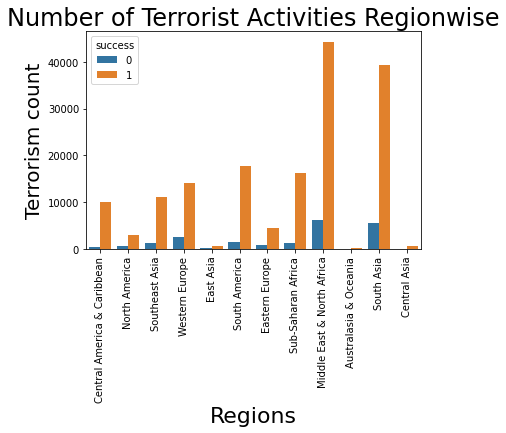

In [93]:
#Number of Terrorist Activities by Region Wise
sns.countplot(x=df['region_txt'], hue ='success', data=df)
plt.xlabel("Regions", fontsize =22)
plt.xticks(rotation=90)
plt.ylabel("Terrorism count", fontsize =20)
plt.title("Number of Terrorist Activities Regionwise", fontsize =24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27e5d0c310>,
      dtype=object)

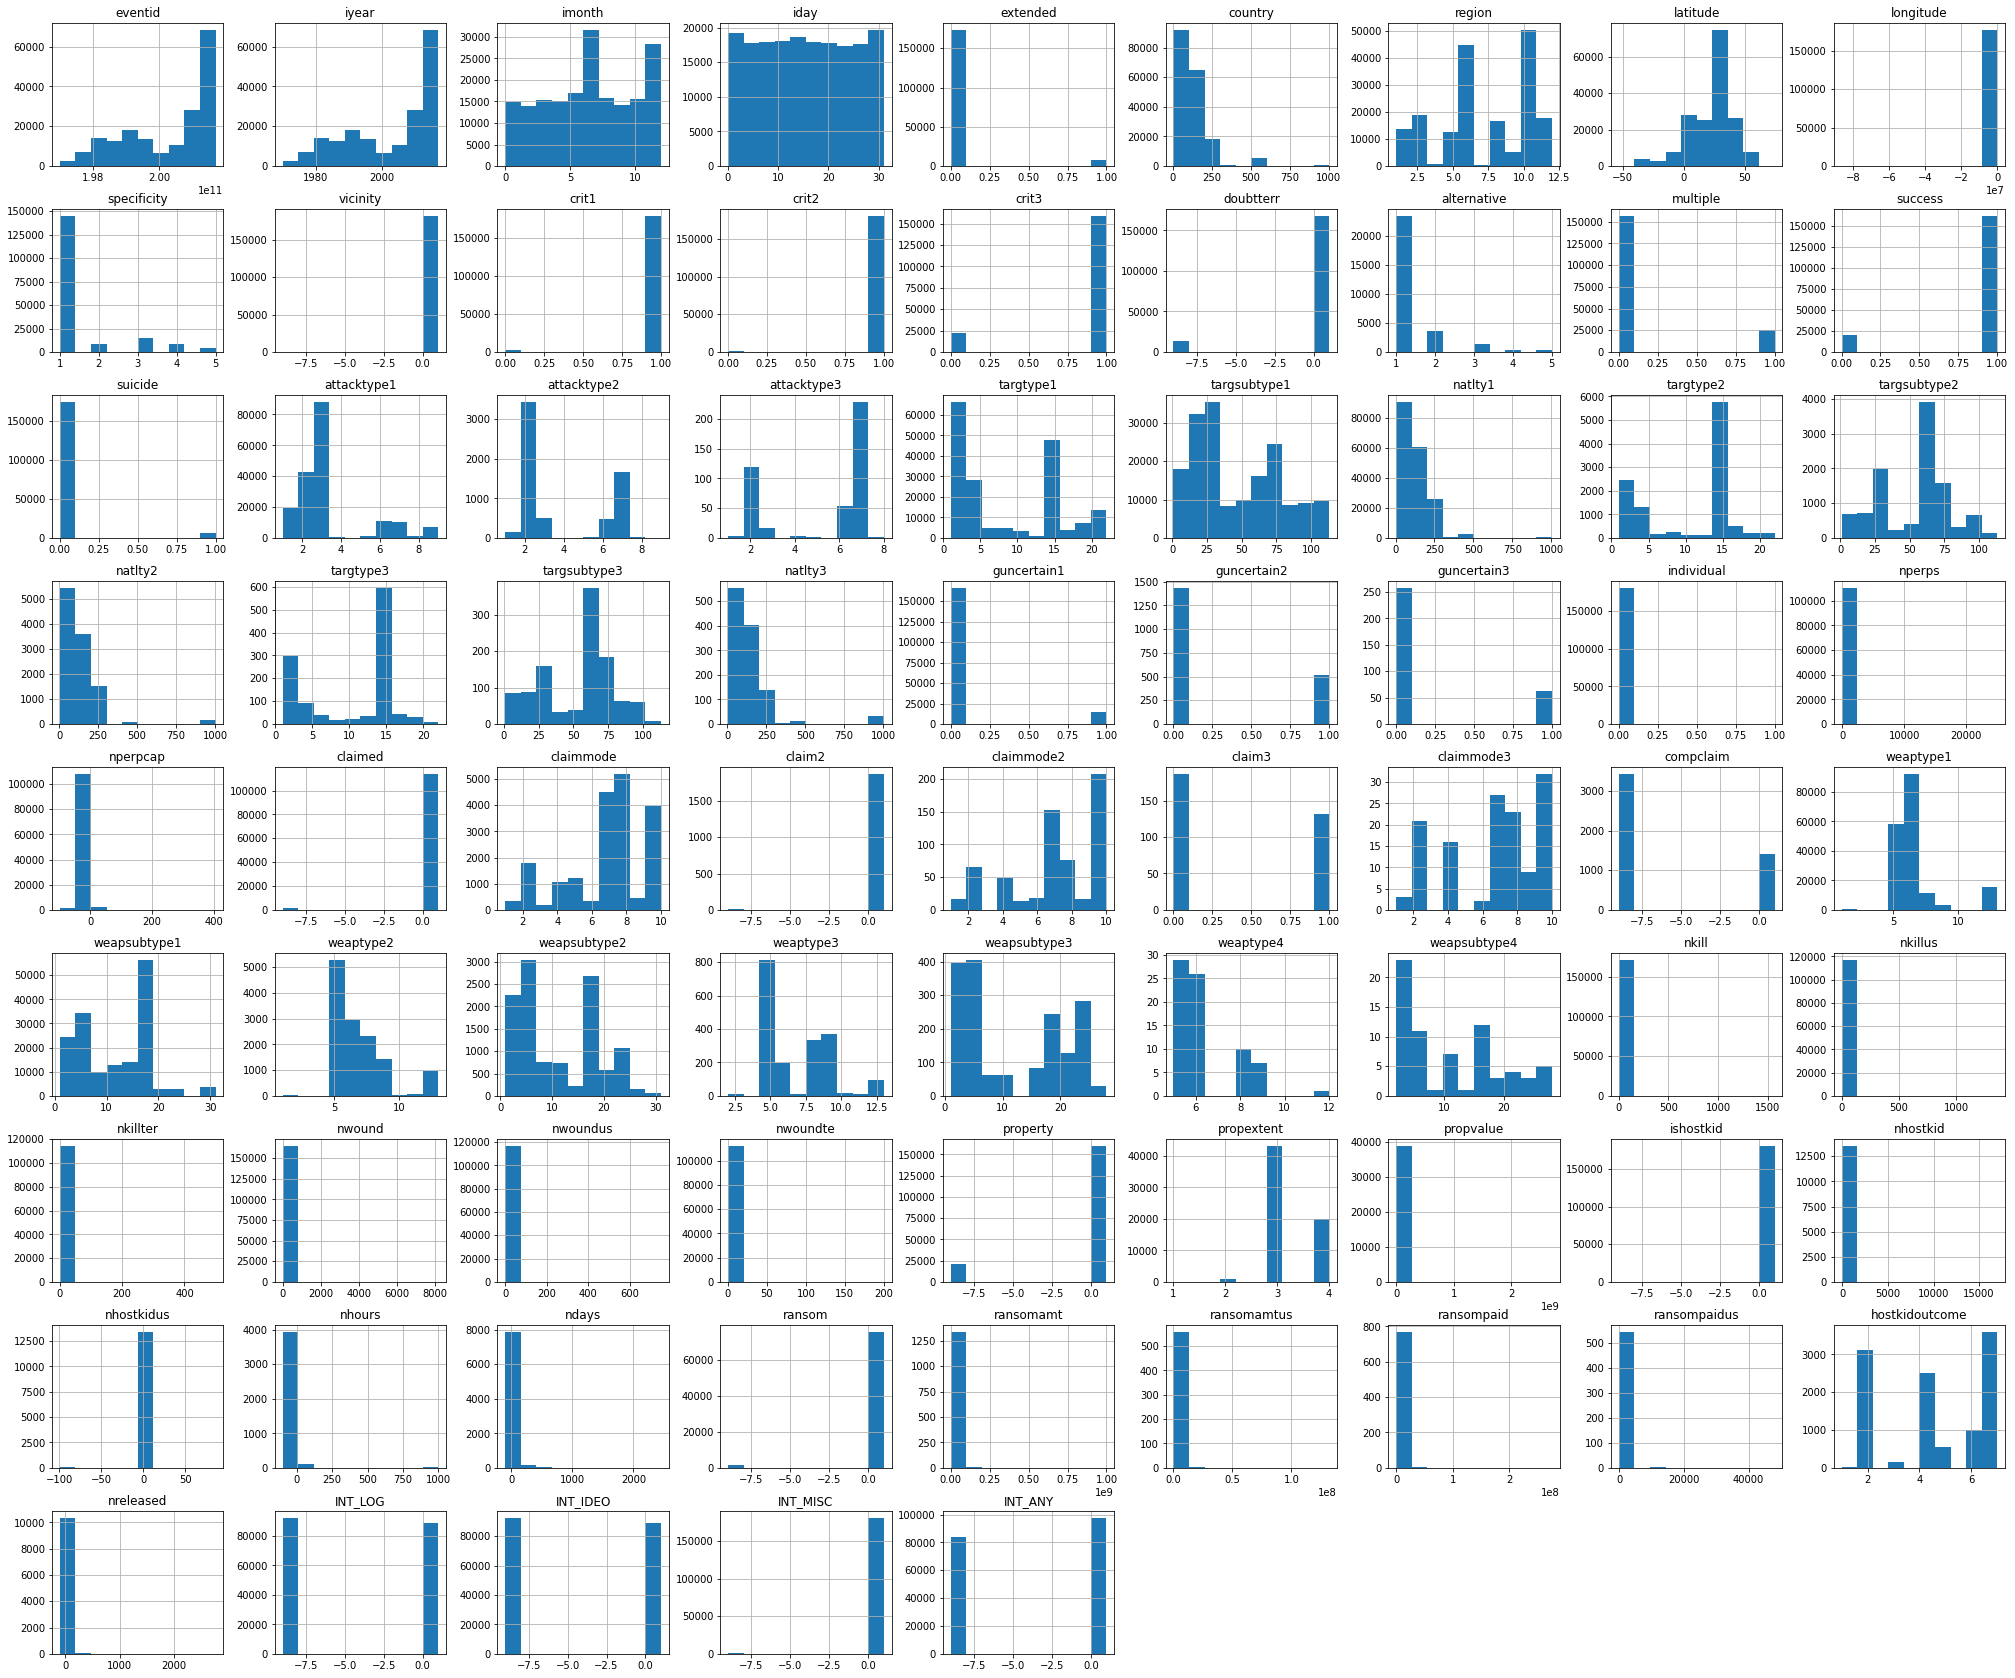

In [ ]:
df.hist(figsize =(35,30))

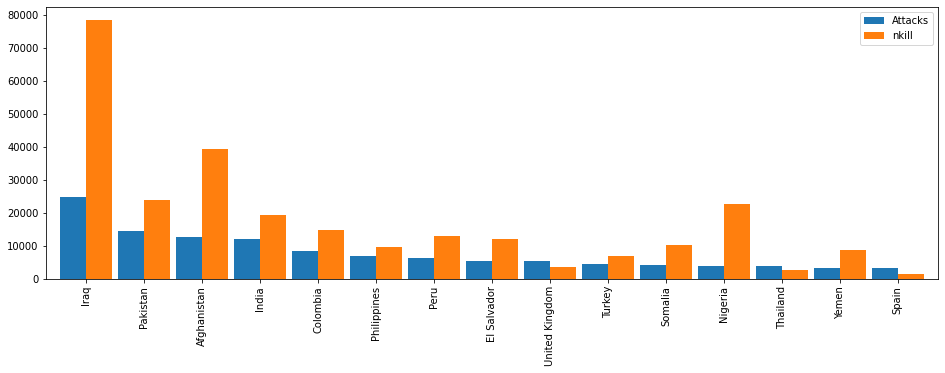

In [95]:
count_terror =df['country_txt'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill =df.groupby('country_txt')['nkill'].sum().to_frame()
count_terror.merge(count_kill,left_index =True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(16,5)
plt.show()

Countries with the highest number of Terrorist Attacks: Iraq